# Logistic Regression

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [8]:
class LogisticRegression :
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        #init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        #gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            
            dw = (1/n_samples)*np.dot(X.T, (y_predicted - y))
            db = (1/n_samples)*np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self,X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_class
    
    def _sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

In [9]:
#dataset
bc = datasets.load_breast_cancer()
X,y = bc.data, bc.target
X_train, X_test , y_train, y_test = train_test_split(X, y , test_size = 0.2 , random_state = 1234)

In [12]:
#Modeling
regressor = LogisticRegression(lr = 0.0001 , n_iters = 1000)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [13]:
#Metric
def accuracy(y , y_pred):
    accuracy = np.sum(y==y_pred)/len(y)
    return accuracy

print(accuracy(y_test, predicted))

0.9298245614035088


## Reference

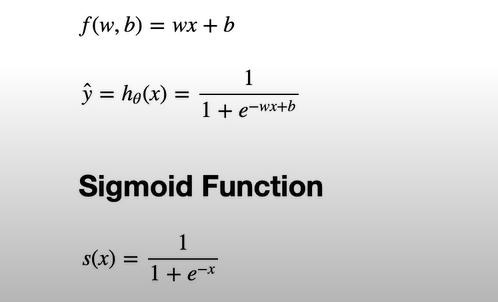

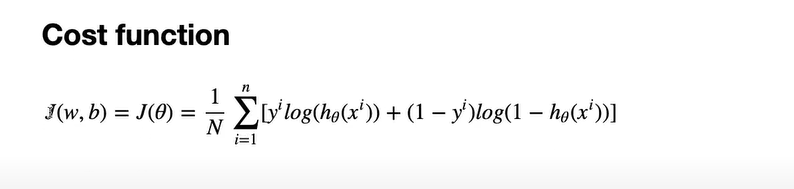

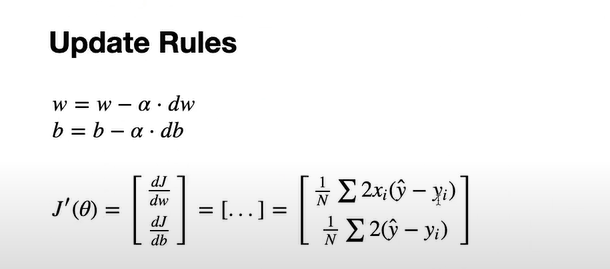